In [1]:
# Import the libraries
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")
import numpy as np

import pandas as pd
import import_ipynb
from cancer_helper import *
from init_data import *

importing Jupyter notebook from cancer_helper.ipynb
importing Jupyter notebook from init_data.ipynb


In [2]:
# Process the CSV data and put it into X as features
np_data = pd.read_csv('STAD.csv',keep_default_na=False, sep=';',header=None, encoding = "utf-8").values
X, feature_labels, vital_status, death_days_to, outcome = init_data_STAD(np_data)
num_groups = 5

**Vital status**

In [3]:
y = vital_status
iters = 200 # recommended 40000
alpha = 0.00000001

vital_status_train(X, y, alpha, iters, num_groups, feature_labels)

In class model:
Average train final cost: nan
Average train accuracy: 36.30 %
Average train F1 score: 0.39
Average test accuracy: 37.47 %
Average test F1 score: 0.40

Scikit model:
Average train final cost: 7.87
Average train accuracy: 77.21 %
Average train F1 score: 0.79
Average test final cost: 8.23
Average test accuracy: 76.17 %
Average test F1 score: 0.77

Highest average weights:
tumor_status : 11.81
new_tumor_event_type : 3.02
tumor_stage : 1.13


**Death days to**

In [4]:
dead = np.nonzero(vital_status == 0)[0]
y = death_days_to[dead].astype('int')
X_death = X[dead, :]
iters = 4000
alpha = 0.005

death_days_to_train(X_death, y, alpha, iters, num_groups)

In-class model:
Average final cost: 3636134.78

Scikit model:
Average train accuracy: 57.66 %
Average test accuracy: 57.13 %


**Outcome**

In class model:
Logistic regression:
Average train final cost: nan
Average train accuracy: 64.18 %
Average train F1 score: 0.64
Average test accuracy: 65.83 %
Average test F1 score: 0.66

One vs all:
Average train accuracy: 84.88 %
Average train F1 score: 0.85
Average test accuracy: 82.18 %
Average test F1 score: 0.83

Scikit model:
Average train accuracy: 85.29 %
Average train F1 score: 0.85
Average test accuracy: 83.08 %
Average test F1 score: 0.83

Highest average weights:
tumor_status : 15.39
histological_grade : 3.61
gender : 2.39


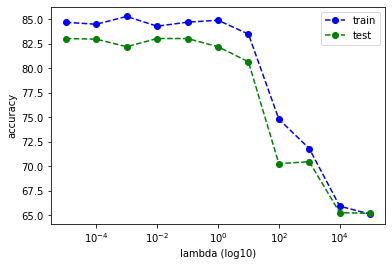

In [6]:
y = outcome
lambda_val = 1
interested_in = [0, 2]

# print_num_samples(y)
outcome_train(X, y, interested_in, lambda_val, num_groups, feature_labels)